# TweetVisualizer: Real-Time Word Cloud from Twitter Streams

### Importing Necessary Libraries

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re



## 1. Loading Data
- Import Libraries: Basic libraries for data handling (pandas, numpy), visualization (seaborn, matplotlib), and text processing (CountVectorizer from sklearn, nltk, re, string). 
- Load CSV Data: The script loads the dataset using pandas.

In [3]:

%matplotlib inline
pd.set_option('display.max_colwidth', 100)

def load_data():
    data = pd.read_csv('Sarcasm_Headlines_Dataset.csv')
    return data

tweet_df = load_data()

## 2. Dataset Overview
- Check Dataset Size and Columns: Displays shape and columns of the dataset.
- Dataset Info: Shows summary information about the dataset including the number of entries and data types.

In [4]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)
tweet_df.info()


Dataset size: (28619, 3)
Columns are: Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


## 3. Data Visualization
- Count Plot: Visualizes the distribution of sarcastic vs. non-sarcastic headlines.

<Axes: xlabel='is_sarcastic', ylabel='count'>

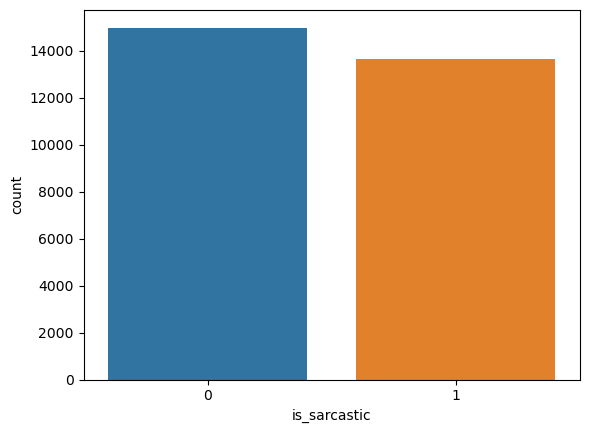

In [5]:
sns.countplot(x = 'is_sarcastic', data = tweet_df)


## 4. Word Clouds
- Create Word Clouds: Generates word clouds for all headlines, sarcastic headlines, and non-sarcastic headlines.

In [15]:
# pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

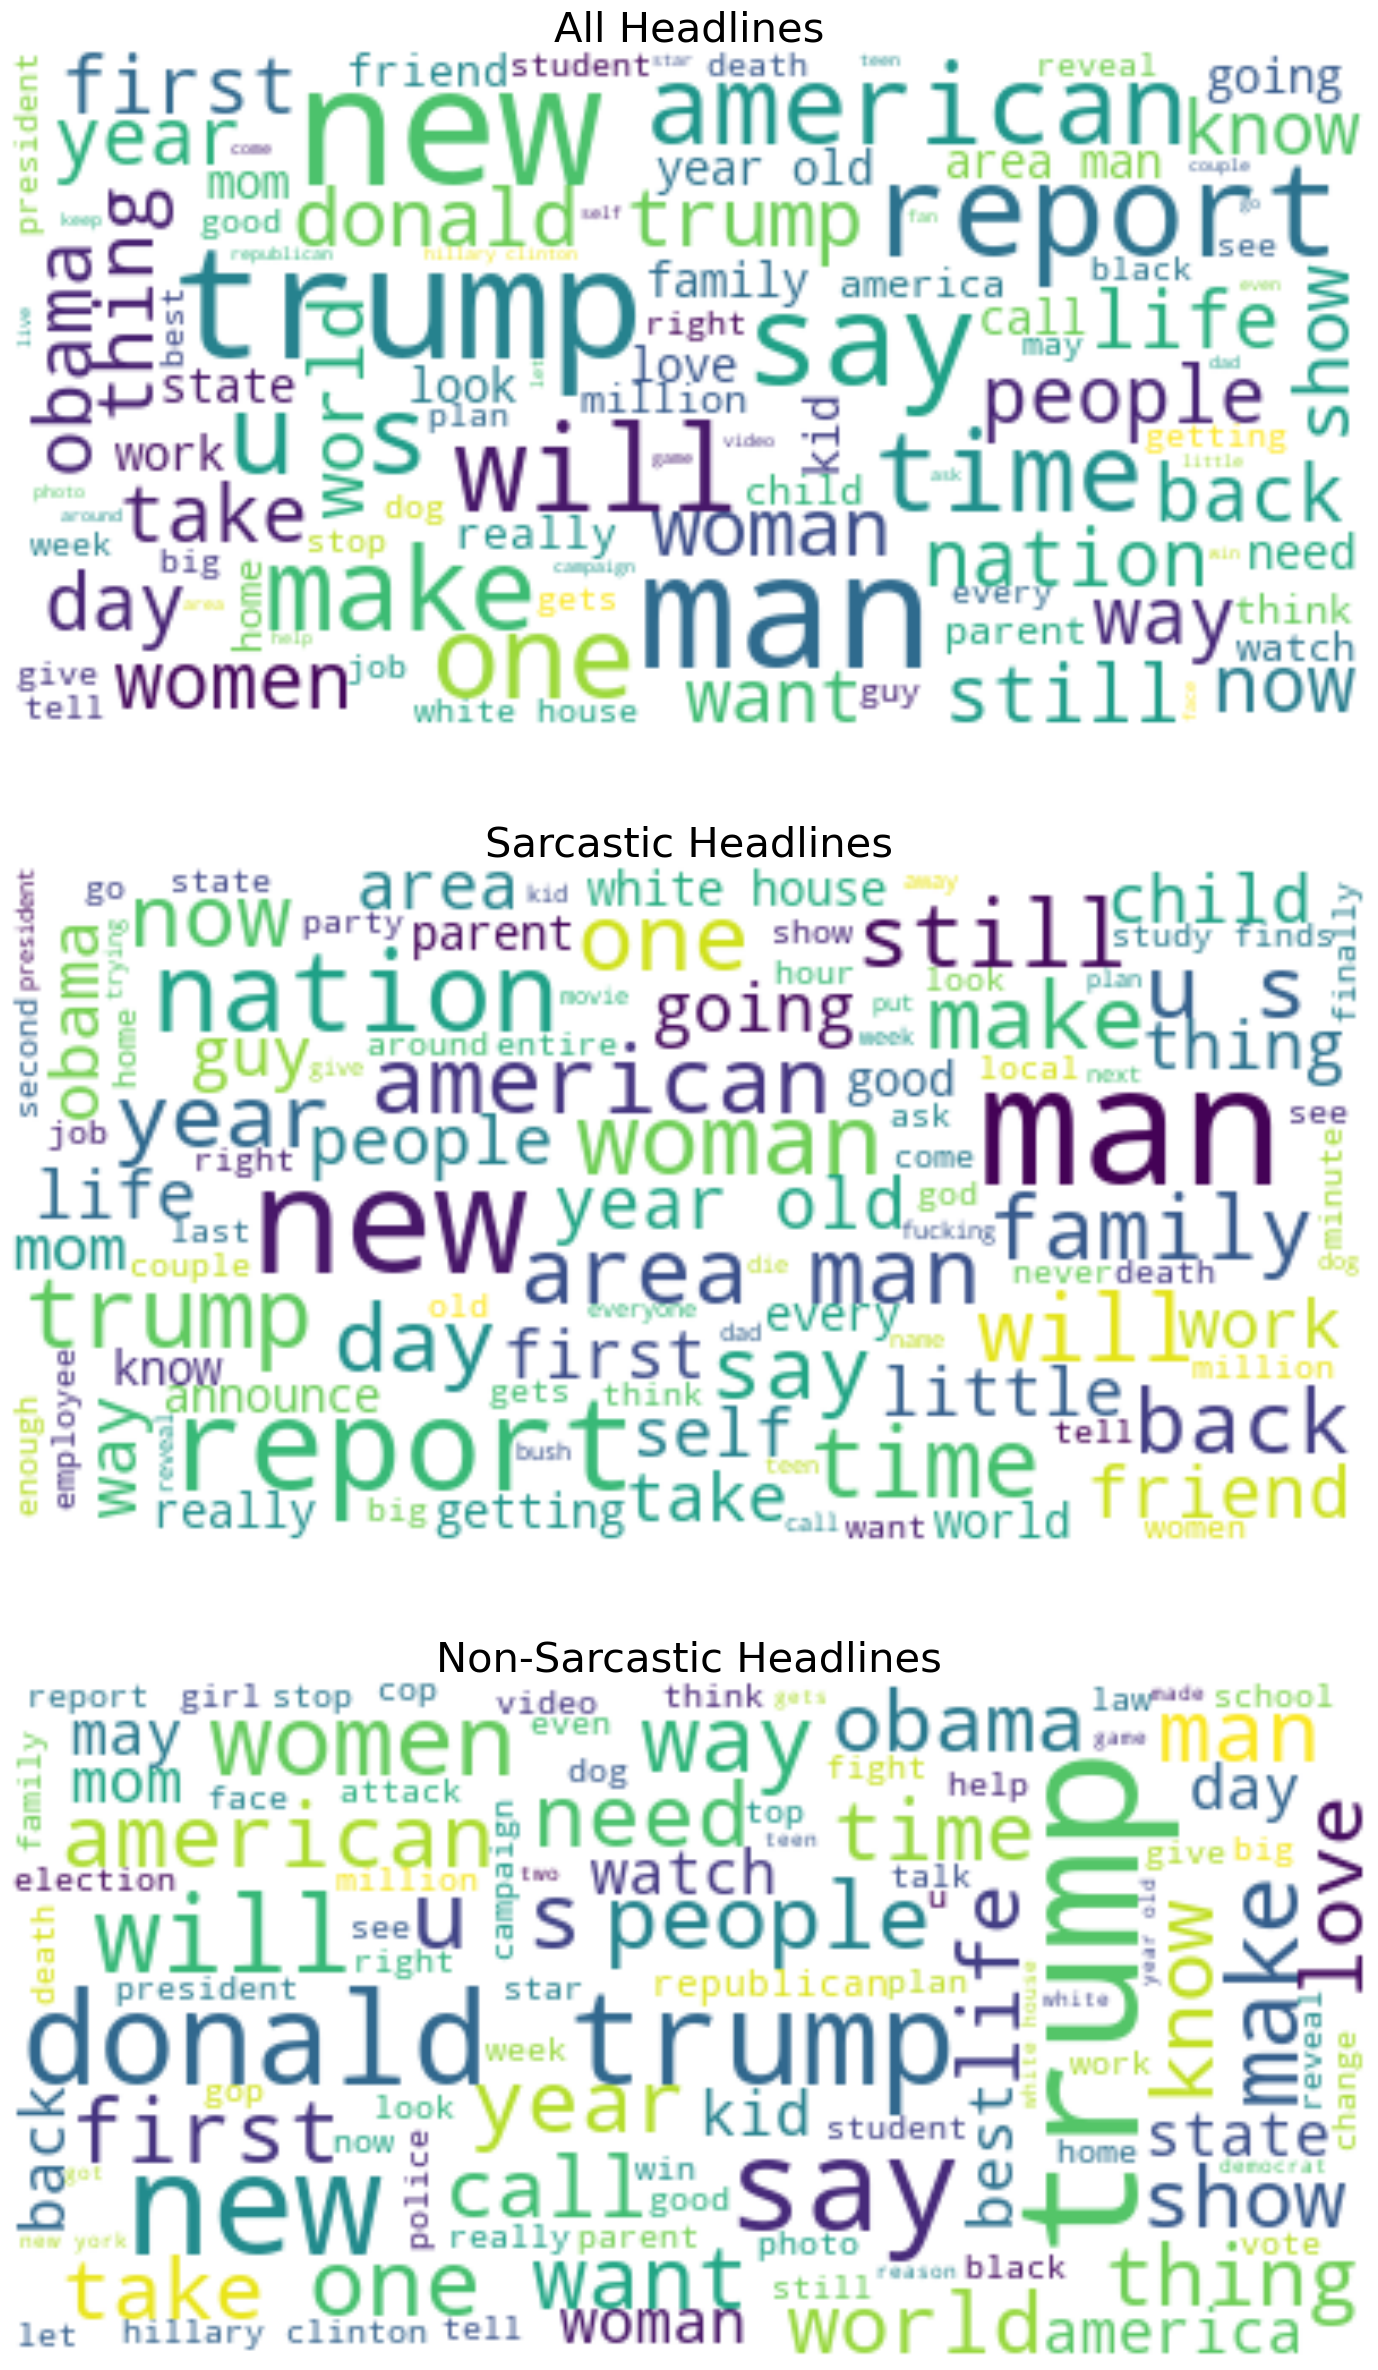

In [11]:
from wordcloud import WordCloud

df_ADR = tweet_df[tweet_df['is_sarcastic']==1]
df_NADR = tweet_df[tweet_df['is_sarcastic']==0]

tweet_All = " ".join(review for review in tweet_df['headline'])
tweet_ADR = " ".join(review for review in df_ADR['headline'])
tweet_NADR = " ".join(review for review in df_NADR['headline'])

fig, ax = plt.subplots(3, 1, figsize = (30,30))

wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Headlines', fontsize=30)
ax[0].axis('off')

ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Sarcastic Headlines', fontsize=30)
ax[1].axis('off')

ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Non-Sarcastic Headlines', fontsize=30)
ax[2].axis('off')


## 5. Text Preprocessing
- Remove Punctuation and Digits: Removes punctuation and digits from headlines.
- Tokenization: Splits headlines into tokens.
- Remove Stopwords: Removes common stopwords from tokens.
- Stemming and Lemmatization: Reduces words to their root form.

In [12]:
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['Tweet_punct'] = tweet_df['headline'].apply(lambda x: remove_punct(x))

def tokenization(text):
    text = re.split('\W+', text)
    return text

tweet_df['Tweet_tokenized'] = tweet_df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))

stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

tweet_df['Tweet_nonstop'] = tweet_df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_df['Tweet_stemmed'] = tweet_df['Tweet_nonstop'].apply(lambda x: stemming(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweet_df['Tweet_lemmatized'] = tweet_df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))


## 6. Vectorization
- Vectorize Text: Converts cleaned and preprocessed text into a numerical format using CountVectorizer.
python

In [13]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation])
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)  # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords
    return text

countVectorizer = CountVectorizer(analyzer=clean_text)
countVector = countVectorizer.fit_transform(tweet_df['headline'])

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())


## 7. Feature Creation and Analysis
- Text Length Hypothesis: Assumes sarcastic headlines are longer than non-sarcastic ones and visualizes this.

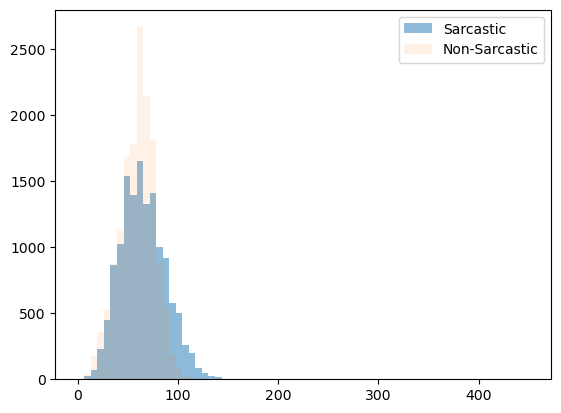

In [14]:
bins_ = np.linspace(0, 450, 70)
ADR_tweet_1 = tweet_df[tweet_df['is_sarcastic'] == 1]['headline'].apply(lambda x: len(x))
ADR_tweet_0 = tweet_df[tweet_df['is_sarcastic'] == 0]['headline'].apply(lambda x: len(x))

plt.hist(ADR_tweet_1, bins= bins_, alpha = 0.5, label = 'Sarcastic')
plt.hist(ADR_tweet_0, bins= bins_, alpha = 0.1, label = 'Non-Sarcastic')
plt.legend()


-- Thank you --